In [12]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
df = pd.read_csv("netflix daily top 10.csv")

In [14]:
df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [15]:
df.shape

(7100, 10)

In [40]:
df.info() #Há series com tipos errados - "Object" deveria ser "int"
          # 'As of' deveria estar como tipo 'Date'
          # Há dados nulos na coluna "Netflix Exclusive"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [41]:
inicio = pd.to_datetime(df['As of']).dt.date.min()
print(inicio)

2020-04-01


In [42]:
fim = pd.to_datetime(df['As of']).dt.date.max()
print(fim)

2022-03-11


In [43]:
df.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [44]:
df['Netflix Exclusive'].value_counts()

Yes    4599
Name: Netflix Exclusive, dtype: int64

In [16]:
df.loc[df['Netflix Exclusive'].isnull(), 'Netflix Exclusive'] = 'No' #Preencendo valores nulos

In [17]:
df.isnull().sum()

As of                   0
Rank                    0
Year to Date Rank       0
Last Week Rank          0
Title                   0
Type                    0
Netflix Exclusive       0
Netflix Release Date    0
Days In Top 10          0
Viewership Score        0
dtype: int64

In [66]:
df.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


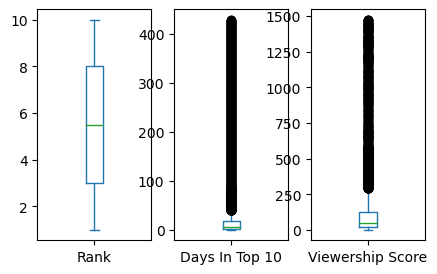

In [78]:
df.plot(kind='box',figsize=(5,3),subplots=True) #Verificação de outliers
plt.show()

In [86]:
verificar = df[df['Days In Top 10'] >= 100 ]
verificar

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2886,2021-01-14,7,6,8,Cocomelon,TV Show,No,"Jun 1, 2020",100,287
2896,2021-01-15,7,7,10,Cocomelon,TV Show,No,"Jun 1, 2020",101,291
2909,2021-01-16,10,7,9,Cocomelon,TV Show,No,"Jun 1, 2020",102,292
2919,2021-01-17,10,10,9,Cocomelon,TV Show,No,"Jun 1, 2020",103,293
3019,2021-01-27,10,-,-,Cocomelon,TV Show,No,"Jun 1, 2020",104,294
...,...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,-,Cocomelon,TV Show,No,"Jun 1, 2020",424,1466
6687,2022-01-29,8,5,8,Cocomelon,TV Show,No,"Jun 1, 2020",425,1469
6718,2022-02-01,9,-,7,Cocomelon,TV Show,No,"Jun 1, 2020",426,1471
6959,2022-02-25,10,-,-,Cocomelon,TV Show,No,"Jun 1, 2020",427,1472


In [90]:
df.Title.value_counts()

Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Office                        1
Animals on the Loose: A You…      1
Dark                              1
The Secret Life of Pets 2         1
Step Up Revolution                1
Name: Title, Length: 645, dtype: int64

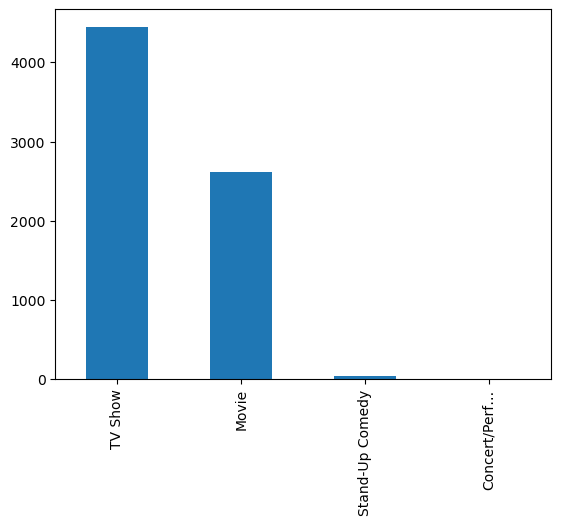

In [92]:
df.Type.value_counts().plot(kind='bar') # os tipos de programações e sua quantidade de visualizações
plt.show()

C:\Users\vinic\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\vinic\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


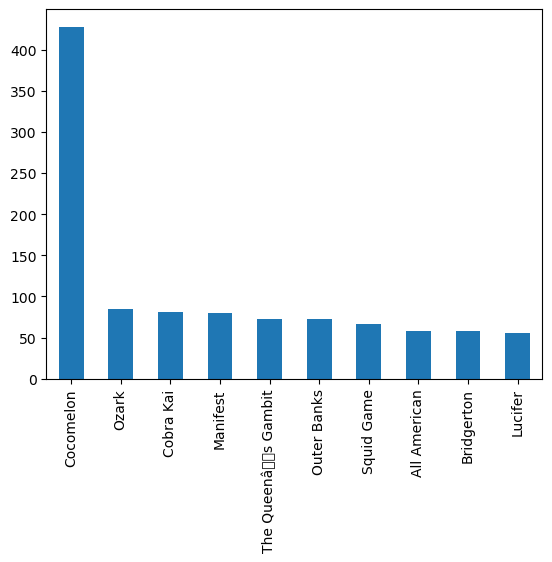

In [27]:
df.Title.value_counts().head(10).plot(kind = 'bar')  #As 10 programações mais vistas na netflix nesse tempo.
plt.show()

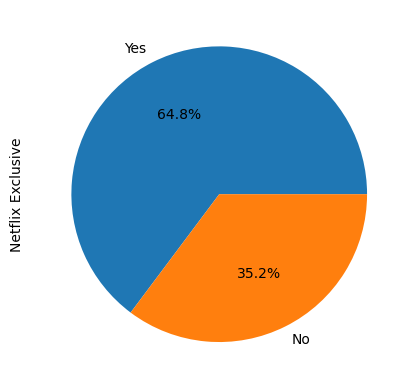

In [26]:
df['Netflix Exclusive'].value_counts().head(10).plot(kind = 'pie', autopct ='%1.1f%%') 
plt.show()  #A maioria da progrmação no ranking pertence exclusivamente a Netflix

Type
Concert/Perf…        2
Movie               31
Stand-Up Comedy     16
TV Show            428
Name: Days In Top 10, dtype: int64